In [1]:
import pandas as pd
import numpy as np
import folium 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('201709-citibike-tripdata.csv')
dataset.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,362,2017-09-01 00:00:17,2017-09-01 00:06:19,3331,Riverside Dr & W 104 St,40.801343,-73.971146,3328,W 100 St & Manhattan Ave,40.795000,-73.964500,14530,Subscriber,1993.0,1
1,188,2017-09-01 00:00:21,2017-09-01 00:03:30,3101,N 12 St & Bedford Ave,40.720798,-73.954847,3100,Nassau Ave & Newell St,40.724813,-73.947526,15475,Subscriber,1988.0,1
2,305,2017-09-01 00:00:25,2017-09-01 00:05:30,3140,1 Ave & E 78 St,40.771404,-73.953517,3141,1 Ave & E 68 St,40.765005,-73.958185,30346,Subscriber,1969.0,1
3,223,2017-09-01 00:00:52,2017-09-01 00:04:36,236,St Marks Pl & 2 Ave,40.728419,-73.987140,473,Rivington St & Chrystie St,40.721101,-73.991925,28056,Subscriber,1993.0,1
4,758,2017-09-01 00:01:01,2017-09-01 00:13:40,3427,Lafayette St & Jersey St,40.724305,-73.996010,3431,E 35 St & 3 Ave,40.746524,-73.977885,25413,Subscriber,1987.0,1


In [3]:
dataset.isnull().sum()

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
birth year                 207468
gender                          0
dtype: int64

In [4]:
from matplotlib.patches import Circle

C:\Users\Rafli Syawal\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


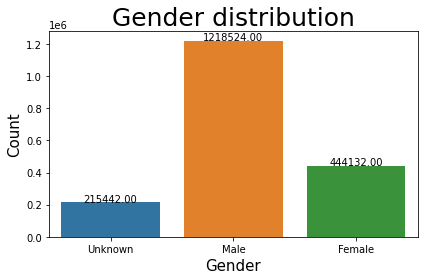

In [5]:
splot = sns.countplot('gender', data=dataset)

for p in splot.patches:
    an = splot.annotate(format(p.get_height(), '.2f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center',
                       va = 'center', 
                       xytext = (0, 3.5), 
                       textcoords = 'offset points')
    an.set_size(10)
splot.axes.set_title("Gender distribution",fontsize=25)
splot.axes.set_xlabel("Gender",fontsize=15)
splot.axes.set_ylabel("Count",fontsize=15)

#adding x tick values
splot.axes.set_xticklabels(['Unknown', 'Male', 'Female'])
plt.tight_layout()
plt.show()

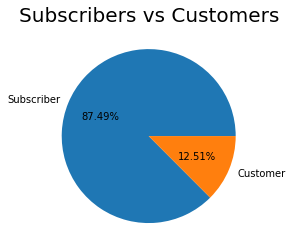

In [6]:
user_type_count = dataset['usertype'].value_counts()
plt.pie(user_type_count.values, labels=user_type_count.index ,autopct='%1.2f%%', textprops={'fontsize': 10} )
plt.title('Subscribers vs Customers', fontsize=20)
plt.show()

In [7]:
import datetime as dt
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 12
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878098 entries, 0 to 1878097
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               float64
 14  gender                   int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 214.9+ MB


In [9]:
dataset['starttime'] = pd.to_datetime(dataset['starttime'], format="%Y/%m/%d %H:%M:%S")
dataset['stoptime'] = pd.to_datetime(dataset['stoptime'], format="%Y/%m/%d %H:%M:%S")

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878098 entries, 0 to 1878097
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   tripduration             int64         
 1   starttime                datetime64[ns]
 2   stoptime                 datetime64[ns]
 3   start station id         int64         
 4   start station name       object        
 5   start station latitude   float64       
 6   start station longitude  float64       
 7   end station id           int64         
 8   end station name         object        
 9   end station latitude     float64       
 10  end station longitude    float64       
 11  bikeid                   int64         
 12  usertype                 object        
 13  birth year               float64       
 14  gender                   int64         
dtypes: datetime64[ns](2), float64(5), int64(5), object(3)
memory usage: 214.9+ MB


In [11]:
dataset['startweekday'] = dataset['starttime'].dt.day_name()
dataset['stopweekday'] = dataset['stoptime'].dt.day_name()

In [12]:
dataset

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startweekday,stopweekday
0,362,2017-09-01 00:00:17,2017-09-01 00:06:19,3331,Riverside Dr & W 104 St,40.801343,-73.971146,3328,W 100 St & Manhattan Ave,40.795000,-73.964500,14530,Subscriber,1993.0,1,Friday,Friday
1,188,2017-09-01 00:00:21,2017-09-01 00:03:30,3101,N 12 St & Bedford Ave,40.720798,-73.954847,3100,Nassau Ave & Newell St,40.724813,-73.947526,15475,Subscriber,1988.0,1,Friday,Friday
2,305,2017-09-01 00:00:25,2017-09-01 00:05:30,3140,1 Ave & E 78 St,40.771404,-73.953517,3141,1 Ave & E 68 St,40.765005,-73.958185,30346,Subscriber,1969.0,1,Friday,Friday
3,223,2017-09-01 00:00:52,2017-09-01 00:04:36,236,St Marks Pl & 2 Ave,40.728419,-73.987140,473,Rivington St & Chrystie St,40.721101,-73.991925,28056,Subscriber,1993.0,1,Friday,Friday
4,758,2017-09-01 00:01:01,2017-09-01 00:13:40,3427,Lafayette St & Jersey St,40.724305,-73.996010,3431,E 35 St & 3 Ave,40.746524,-73.977885,25413,Subscriber,1987.0,1,Friday,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878093,621,2017-09-30 23:59:30,2017-10-01 00:09:52,3366,West End Ave & W 107 St,40.802117,-73.968181,3540,Morningside Ave & W 123 St,40.810000,-73.955151,28812,Subscriber,1980.0,2,Saturday,Sunday
1878094,656,2017-09-30 23:59:33,2017-10-01 00:10:30,3163,Central Park West & W 68 St,40.773407,-73.977825,479,9 Ave & W 45 St,40.760193,-73.991255,19088,Subscriber,1986.0,1,Saturday,Sunday
1878095,516,2017-09-30 23:59:40,2017-10-01 00:08:16,3224,W 13 St & Hudson St,40.739974,-74.005139,382,University Pl & E 14 St,40.734927,-73.992005,29922,Subscriber,NaN,0,Saturday,Sunday
1878096,1039,2017-09-30 23:59:49,2017-10-01 00:17:08,3167,Amsterdam Ave & W 73 St,40.779668,-73.980930,3336,E 97 St & Madison Ave,40.787801,-73.953559,26007,Subscriber,1990.0,1,Saturday,Sunday


## What is the average number of trips per day?

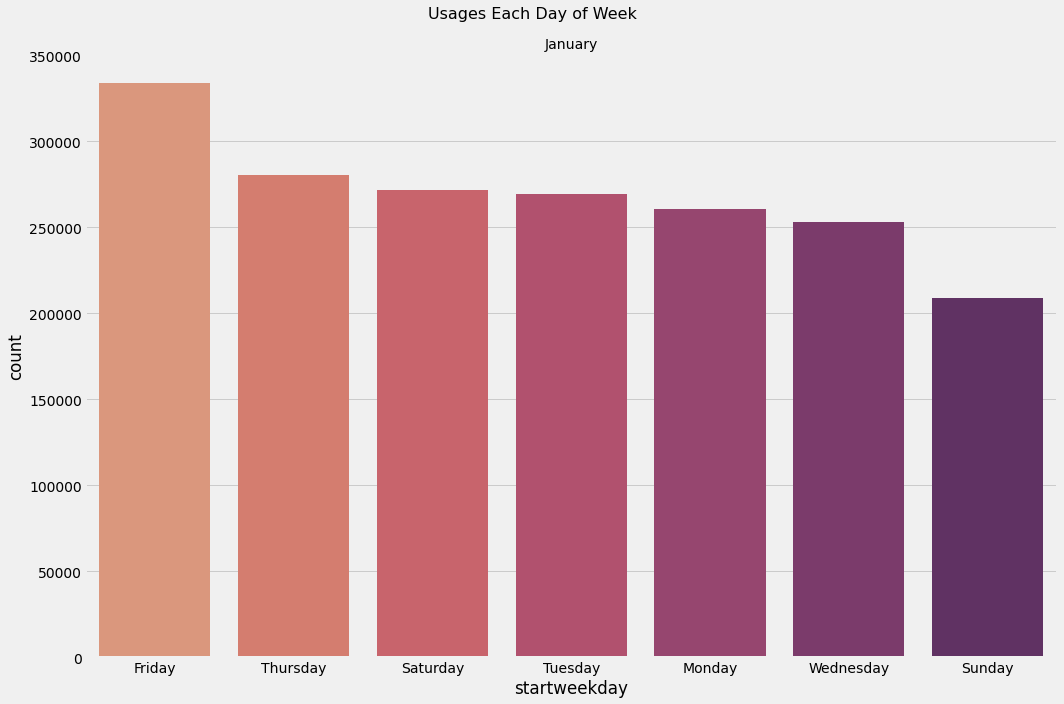

In [13]:
sns.countplot('startweekday', data=dataset, order=dataset['startweekday'].value_counts().index, palette='flare')
plt.title("January", fontsize=14)


plt.suptitle("Usages Each Day of Week", fontsize=16)
plt.tight_layout()
plt.show()

## What is the average trip duration?
### What days of the week are most rides taken on?
#### What hour of the day are most rides taken on?

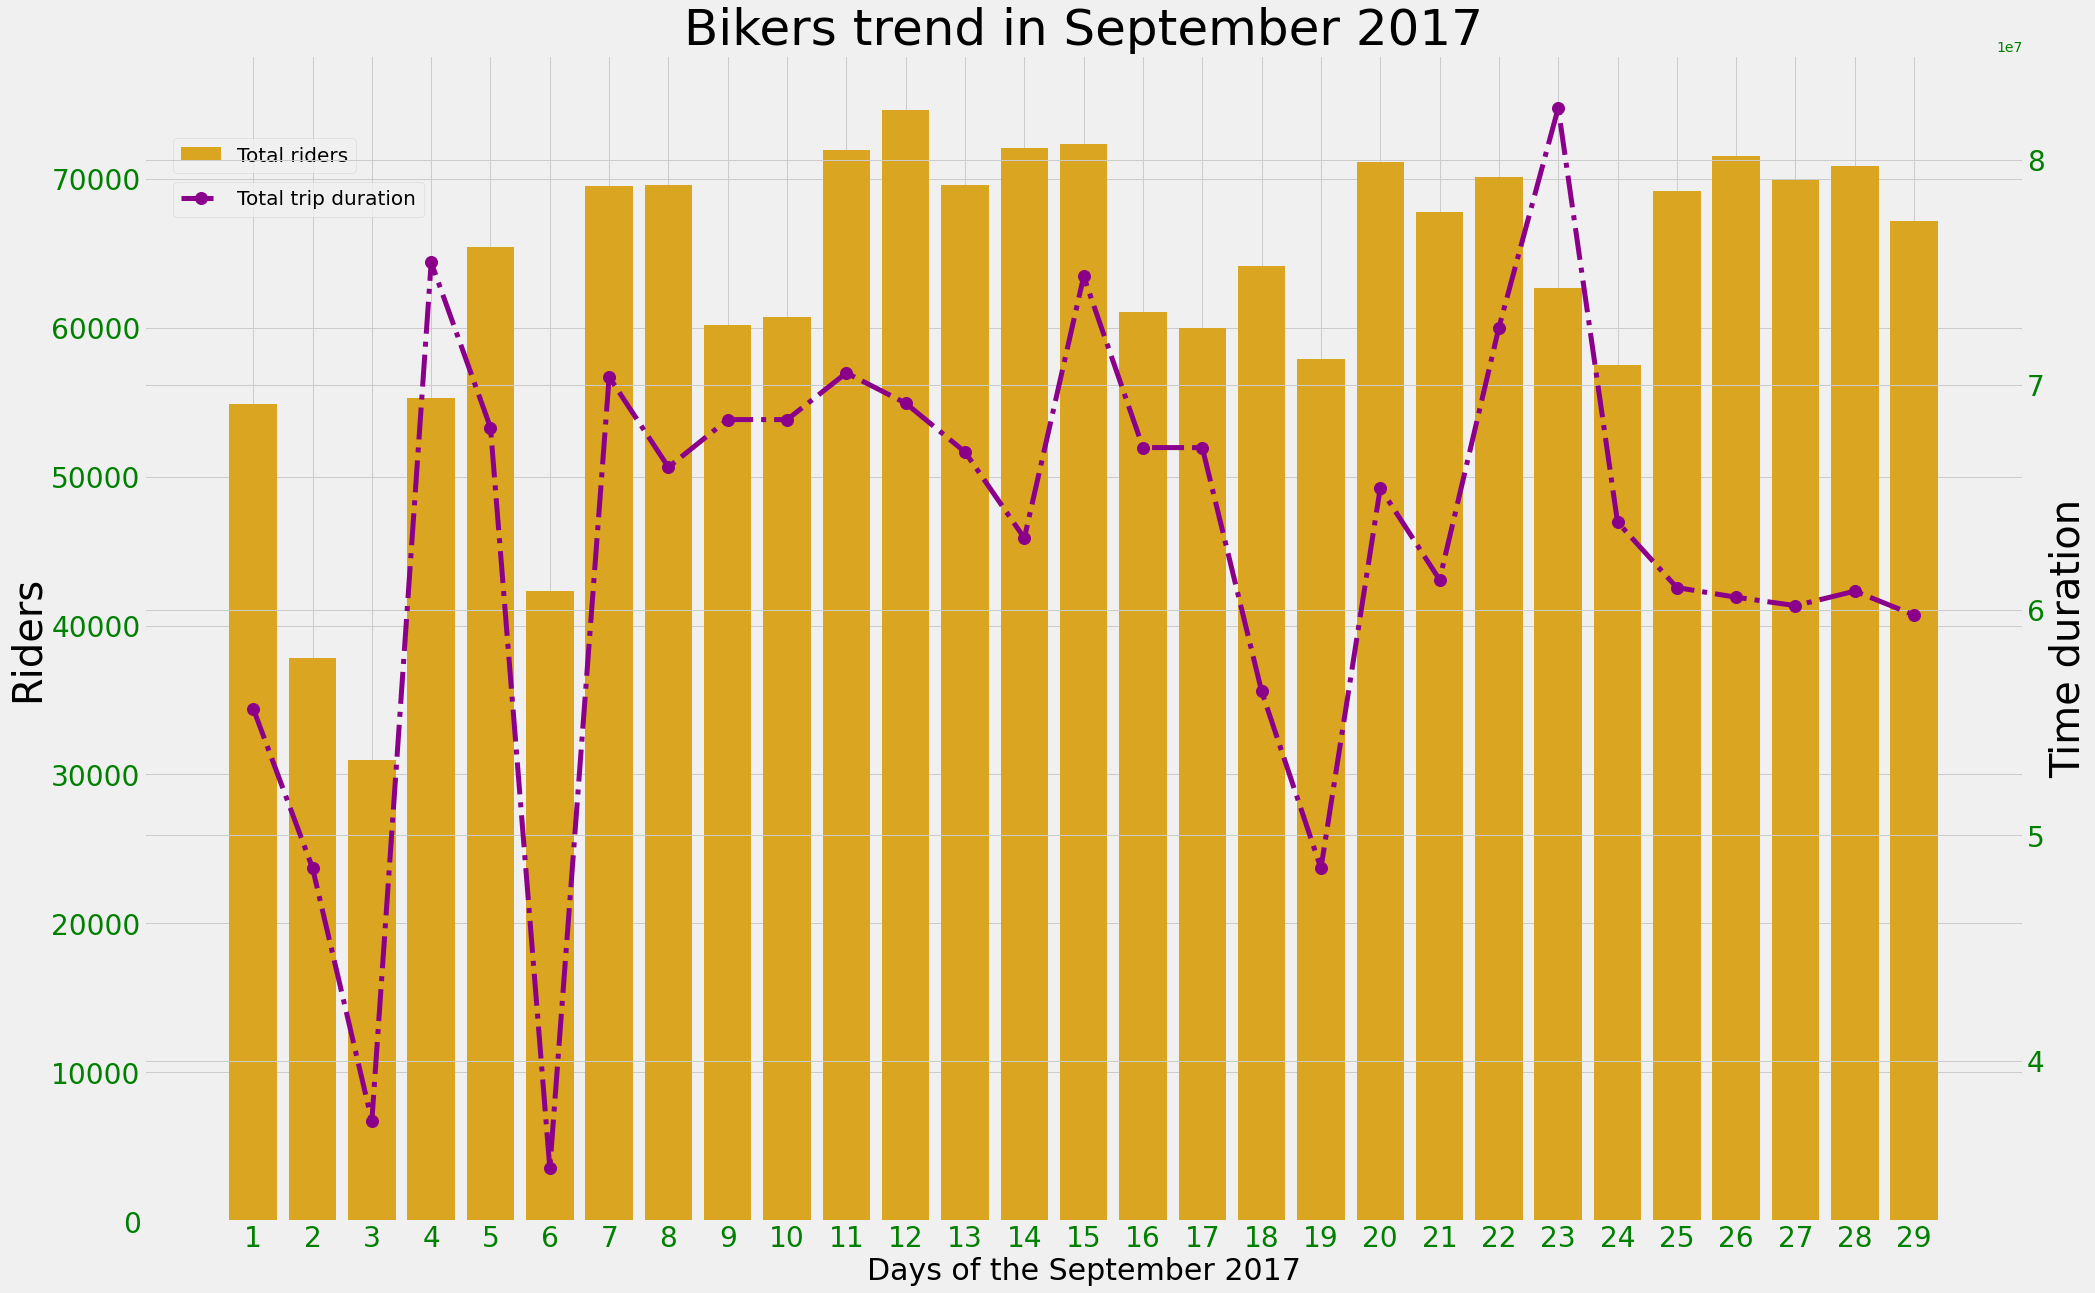

In [14]:
dataset['starttime']= pd.to_datetime(dataset['starttime'])


starttime = dataset.set_index('starttime').groupby(pd.Grouper(freq='D')).count()


starttime.drop(starttime.tail(1).index, axis=0, inplace=True)

durationtrip = dataset.set_index('starttime').groupby(pd.Grouper(freq='D')).sum()

durationtrip.drop(durationtrip.tail(1).index, axis=0, inplace=True)

fig,ax=plt.subplots(figsize=(30, 20))
ax.bar(starttime.index, 'start station id', data=starttime, label='Total riders', color='goldenrod')

ax.legend(loc ="lower left", bbox_to_anchor=(0.01, 0.89), fontsize='20')
ax.set_xlabel('Days of the September 2017', fontsize=30)
ax.set_ylabel('Riders',  fontsize=40)
ax.set_title('Bikers trend in September 2017', fontsize=50)

#creating twin x axis to plot line chart is same figure
ax2=ax.twinx()
#plotting total trip duration of all user per day
ax2.plot('tripduration', data=durationtrip, color='darkmagenta', label='Total trip duration', marker='o', linewidth=5, markersize=12, linestyle = '-.')
ax2.set_ylabel('Time duration',  fontsize=40)
ax2.legend(loc ="upper left", bbox_to_anchor=(0.01, 0.9), fontsize='20')

ax.set_xticks(durationtrip.index)
ax.set_xticklabels([i for i in range(1,30)])

#tweeking x and y ticks labels of axes1
ax.tick_params(labelsize=28, labelcolor='green')
#tweeking x and y ticks labels of axes2
ax2.tick_params(labelsize=28, labelcolor='green')

plt.show()

In [15]:
dataset['age'] = 2021 - dataset['birth year']
dataset.reset_index(drop=True)
dataset

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startweekday,stopweekday,age
0,362,2017-09-01 00:00:17,2017-09-01 00:06:19,3331,Riverside Dr & W 104 St,40.801343,-73.971146,3328,W 100 St & Manhattan Ave,40.795000,-73.964500,14530,Subscriber,1993.0,1,Friday,Friday,28.0
1,188,2017-09-01 00:00:21,2017-09-01 00:03:30,3101,N 12 St & Bedford Ave,40.720798,-73.954847,3100,Nassau Ave & Newell St,40.724813,-73.947526,15475,Subscriber,1988.0,1,Friday,Friday,33.0
2,305,2017-09-01 00:00:25,2017-09-01 00:05:30,3140,1 Ave & E 78 St,40.771404,-73.953517,3141,1 Ave & E 68 St,40.765005,-73.958185,30346,Subscriber,1969.0,1,Friday,Friday,52.0
3,223,2017-09-01 00:00:52,2017-09-01 00:04:36,236,St Marks Pl & 2 Ave,40.728419,-73.987140,473,Rivington St & Chrystie St,40.721101,-73.991925,28056,Subscriber,1993.0,1,Friday,Friday,28.0
4,758,2017-09-01 00:01:01,2017-09-01 00:13:40,3427,Lafayette St & Jersey St,40.724305,-73.996010,3431,E 35 St & 3 Ave,40.746524,-73.977885,25413,Subscriber,1987.0,1,Friday,Friday,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878093,621,2017-09-30 23:59:30,2017-10-01 00:09:52,3366,West End Ave & W 107 St,40.802117,-73.968181,3540,Morningside Ave & W 123 St,40.810000,-73.955151,28812,Subscriber,1980.0,2,Saturday,Sunday,41.0
1878094,656,2017-09-30 23:59:33,2017-10-01 00:10:30,3163,Central Park West & W 68 St,40.773407,-73.977825,479,9 Ave & W 45 St,40.760193,-73.991255,19088,Subscriber,1986.0,1,Saturday,Sunday,35.0
1878095,516,2017-09-30 23:59:40,2017-10-01 00:08:16,3224,W 13 St & Hudson St,40.739974,-74.005139,382,University Pl & E 14 St,40.734927,-73.992005,29922,Subscriber,NaN,0,Saturday,Sunday,NaN
1878096,1039,2017-09-30 23:59:49,2017-10-01 00:17:08,3167,Amsterdam Ave & W 73 St,40.779668,-73.980930,3336,E 97 St & Madison Ave,40.787801,-73.953559,26007,Subscriber,1990.0,1,Saturday,Sunday,31.0


## Is there correlation between age and trip duration?

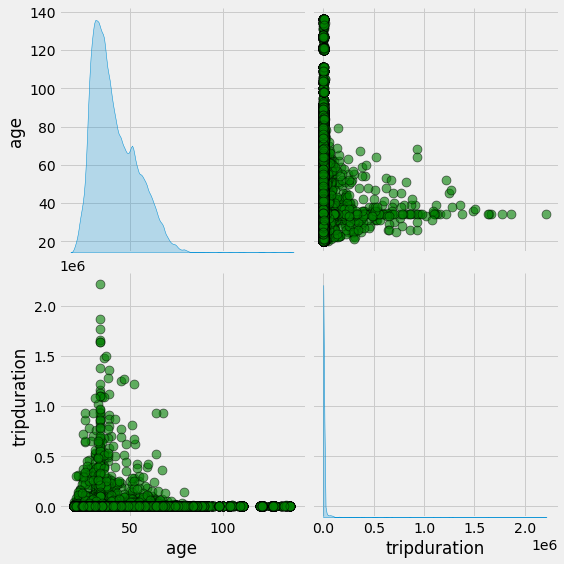

In [16]:
features = ['age', 'tripduration']
sns.pairplot(dataset[features], 
             diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k', 'color':'green'},
             size = 4);

plt.savefig('numerical pairplot.png')

## What are the top 10 pair of stations that our riders use as a start & stopping point?

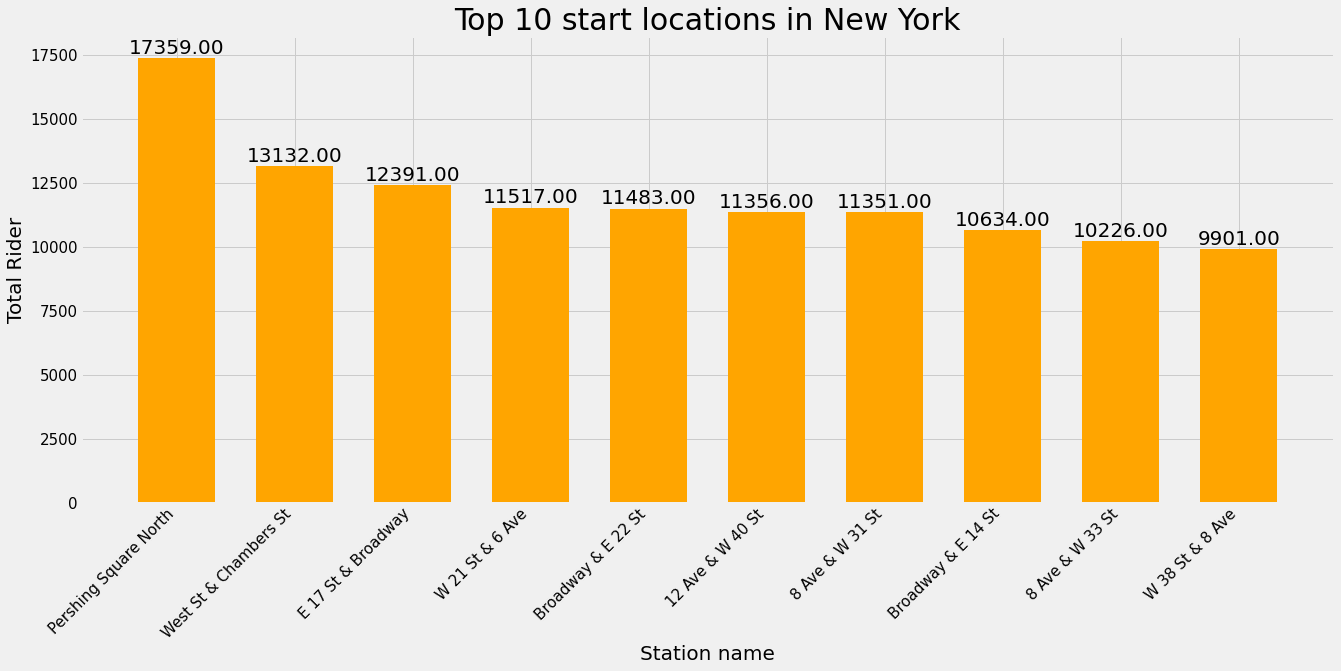

In [31]:
top_start_station = dataset['start station name'].value_counts()[:10]

fig,ax=plt.subplots(figsize=(20,8))
ax.bar(x=top_start_station.index, height=top_start_station.values, color='orange', width=0.65)


for p in ax.patches:
    an = ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center',
                   va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
    an.set_size(20)
ax.set_title("Top 10 start locations in New York",fontsize=30)
ax.set_xlabel("Station name",fontsize=20)

ax.set_xticklabels(top_start_station.index, rotation = 45, ha="right")
ax.set_ylabel("Total Rider",fontsize=20)

ax.tick_params(labelsize=15)
plt.show()

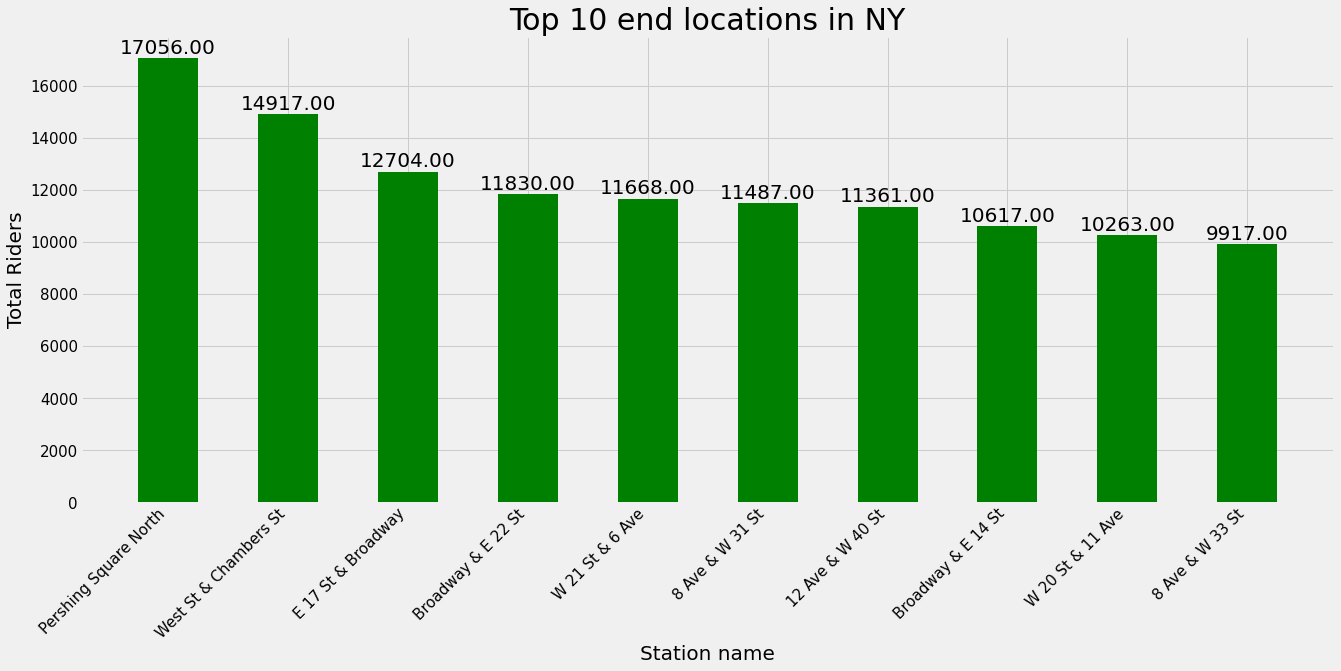

In [34]:
top_end_station = dataset['end station name'].value_counts()[:10]

fig,ax=plt.subplots(figsize=(20,8))
ax.bar(x=top_end_station.index, height=top_end_station.values, color='green', width=0.5)


for p in ax.patches:
    an = ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center',
                   va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
    an.set_size(20)
ax.set_title("Top 10 end locations in NY",fontsize=30)
ax.set_xlabel("Station name",fontsize=20)

#rotating the x tick labels to 45 degrees
ax.set_xticklabels(top_end_station.index, rotation = 45, ha="right")
ax.set_ylabel("Total Riders",fontsize=20)
#tweeking x and y tick labels 
ax.tick_params(labelsize=15)
plt.show()


## Hypothesis

#### "Umur memiliki korelasi dengan durasi perjalanan menggunakan citibikes"

## > Ternyata hubungan durasi perjalanan dengan umur memiliki tingkat korelasi yang cukup rendah